<a href="https://colab.research.google.com/github/ninada25/IS-MLPython/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent in Python! (Gradient descent = an optimization algorithm for minimizing the cost function)

Tasks for Weeks 5 and 6:

Use python to write a for or while loop (for t -> 1:n)
- Tolerance level
- Many different ways to this, can use the cost function to check and make sure that the cost is going down (it should always go down for a linear regression)

Write a function called gradient descent
- Inside put the for or while loop
- Take in alpha (learning rate), initial values of beta and theta, and cost function and then throw out the cost values and the beta theta values, and number of iterations so I can plot the cost function

In [2]:
# upload CSV file to Google Colab
from google.colab import files # import 'files' module from 'google.colab' library

uploaded = files.upload() # upload a file from my local machine to Google Colab

Saving Advertising.csv to Advertising.csv


In [3]:
import pandas as pd # import pandas library for data manipulation + analysis
import numpy as np # for numerical and mathematical operations i.e. arrays, matrices, and mathematical funcs
import matplotlib.pyplot as plt # for visualizations
import seaborn as sn # for more visualizations

file_path = 'Advertising.csv' # specify file path
Advertising = pd.read_csv(file_path) # read CSV file into a df called Auto
print(Advertising.head()) # print first few rows of Advertising df

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


Normalize our X and Y variables:

In [4]:
X = Advertising[['TV','radio','newspaper']]
Y = Advertising['sales']
Y = np.array((Y-Y.mean())/Y.std()) # normalize Y
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) # normalize X

Define algorithm in 4 steps:

- Randomly initialize the bias/intercept (beta) and the weight/slope (theta)
- Calculate predicted value of y that is Y given the bias and the weight
- Calculate the cost function from predicted and actual values of Y
- Calculate gradient and the weights

Let's start with taking a random value for bias and weights (which may or may not actually be close to the optimal bias and weights):

In [5]:
import random # for generating random numbers
def initialize(dim): # create function initialize
  b = random.random() # assign a random value to b
  theta=np.random.rand(dim)
  return b,theta
b,theta=initialize(3) # calling the func and specifying that we want three random values for weights
print("Bias: ",b, "Weights: ",theta)

Bias:  0.09810542342481443 Weights:  [0.77928364 0.32153225 0.46425468]


Calculate the output (Y) using the weights and bias from above:

In [6]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta) # to compute dot product or matrix multiplication of arrays, use np.dot() func (I think I was using * before which is why I was getting a scalar output)
Y_hat=predict_Y(b,theta,X) # Y_hat = predicted output values
Y_hat[0:10] # show predictions for first 10 observations (there are 200 total in this dataset)

array([ 1.99062122, -0.1752915 ,  0.23571639,  1.12488948,  0.72818063,
        0.34504022, -0.65850811, -0.62893143, -2.2468564 , -0.06993643])

Now we need to calculate our cost function:

In [7]:
import math # math library
def get_cost(Y,Y_hat): # cost func. goal: minimize this!
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd) # had to google this; uses transpose of residuals to div the SSR by # of samples to compute avg sq error, which rep the cost func. result should be a scalar
Y_hat=predict_Y(b,theta,X) # still using initial bias and weights
get_cost(Y,Y_hat)

0.3068253572120067

Now we need the updated bias and weights:

In [8]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate): # alpha = learning rate
  db=(np.sum(y_hat-y)*2)/len(y) # deriv of cost func with respect to bias
  dw=(np.dot((y_hat-y),x)*2)/len(y) # deriv of cost func with respect to weight
  b_1=b_0-learning_rate*db # compute updated bias
  theta_1=theta_o-learning_rate*dw # compute updated weights
  return b_1,theta_1
print("After initialization... Bias: ",b,"Theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.001) # call update_theta func and set learning rate to 0.001. use updated b and theta values
print("After first update... Bias: ",b,"Theta: ",theta)
get_cost(Y,Y_hat) # show new cost

After initialization... Bias:  0.09810542342481443 Theta:  [0.77928364 0.32153225 0.46425468]
After first update... Bias:  0.0979092125779648 Theta:  [0.77920209 0.32162695 0.46347071]


0.3068253572120067

The cost should have went down since we are doing a linear regression! Now let's put everything together and create our gradient descent function which will run for a specified number of iterations and give us the optimal bias/intercept and weights/slopes (there should be 3 since we have 3 predictor variables/inputs).

In [9]:
def run_gradient_descent(X, Y, alpha, num_iterations): # alpha = learning rate
    b, theta = initialize(X.shape[1]) # call initialize function to initialize intercept and weights based on # features in X
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost']) # create a df with columns 'iteration' and 'cost'
    result_idx = 0
    for each_iter in range(num_iterations): # for loop!!!
        Y_hat = predict_Y(b, theta, X) # compute Y_hat using initial vals of b and theta
        this_cost = get_cost(Y, Y_hat) # calculate cost between predicted values and true values using get_cost func
        prev_b = b
        prev_theta = theta
        # Take in alpha, init vals of beta and theta, and cost function and throw out beta theta values and # iterations so I can plot cost func
        b, theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha) # update parameters using update_theta func
        if iter_num % 10 == 0: # every 10 iterations...
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost] # assign list [iter_num, this_cost] to the row identified by 'result.idx'
            result_idx += 1 # increment 'result_idx' var by 1
        iter_num += 1 # increment 'iter_num' var by 1
    print("Final Estimate of b and theta:", b, theta)
    return gd_iterations_df, b, theta # return df with info abt iterations and cost, as well as updated estimates of beta and thetas

gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)

gd_iterations_df[0:10]

Final Estimate of b and theta: 0.05299632382652763 [0.6429799  0.28445357 0.63470821]


,iteration,cost
0,0.0,0.836588
1,10.0,0.810337
2,20.0,0.785144
3,30.0,0.760964
4,40.0,0.737749
5,50.0,0.715459
6,60.0,0.694051
7,70.0,0.673488
8,80.0,0.653731
9,90.0,0.634747


We can plot iterations VS cost to make sure the cost function is decreasing as we increase the number of iterations.

Text(0, 0.5, 'Cost')

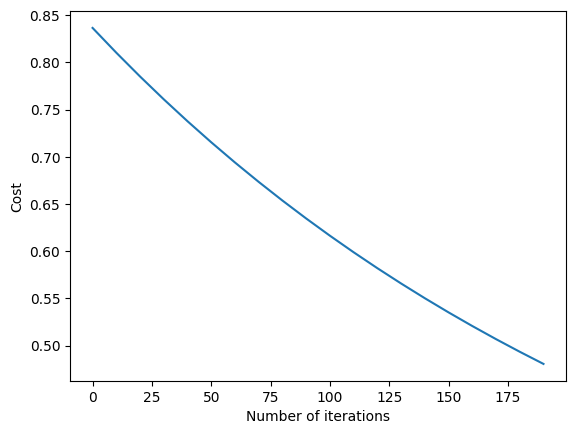

In [10]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost']) # plot iterations VS cost
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Notice that we have not reached convergence after 200 iterations. Let's now do 2000 iterations with alpha = 0.01 to see which learning rate performs better for this dataset:

Final Estimate of b and theta: -5.5055837116391183e-17 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta: 0.01674831447182103 [ 0.74361639  0.55362456 -0.0173721 ]


Text(0.5, 1.0, 'Cost Vs. Iterations for Different Alpha Values')

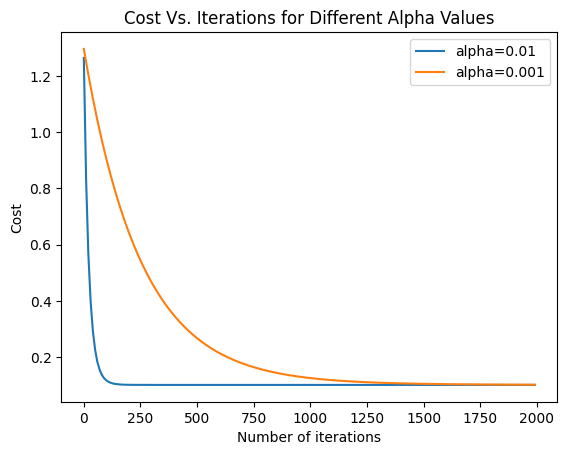

In [11]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000) # alpha = 0.01
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000) # alpha = 0.001
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for Different Alpha Values')

0.01 is the optimal learning rate because it converges much more quickly than 0.001. 0.01 converges around the 100 mark, whereas 0.001 takes around 1500 iterations to reach convergence. The optimal alpha differs for every dataset.

We built a gradient descent algorithm!

Tasks for Weeks 7 and 8: Learn about and implement batch, mini batch, and stochastic gradient descent.

The code above represents batch gradient descent. In batch gradient descent, you update the parameters (weights and bias in this case) using the gradients computed from the entire dataset. That's exactly what we're doing in the code above, which does the following:

* Iteration through the entire dataset: We are iterating through the entire dataset in each iteration (batch). The for loop runs for num_iterations, which means it processes the entire dataset in each iteration.
* Update based on the entire dataset: The update_theta function updates the parameters b and theta using gradients computed from the entire dataset X and corresponding labels Y.
* Cost calculation: The cost is calculated using all the samples in the dataset. The get_cost function computes the cost by comparing all predicted values Y_hat with true values Y.

In contrast:

* Stochastic Gradient Descent (SGD) updates the parameters using only one randomly chosen sample from the dataset in each iteration.
* Mini-batch Gradient Descent updates the parameters using a subset of the dataset (mini-batch) in each iteration.





Let's start by trying to implement stochastic gradient descent (SGD), which as I just mentioned updates the parameters using only ONE randomly chosen sample from the dataset in each iteration:

Final Estimate of b and theta: -0.018381127936350737 [0.75163673 0.52943353 0.00314301]


Text(0, 0.5, 'Cost')

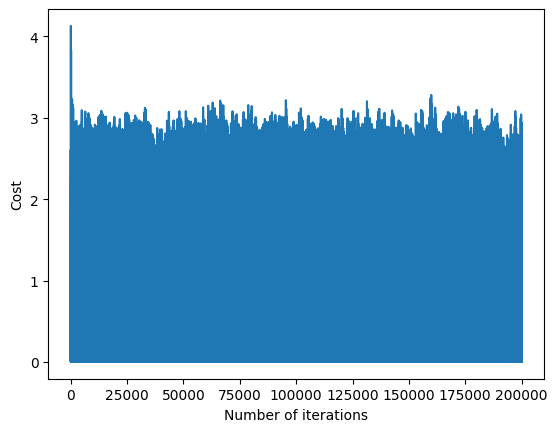

In [14]:
import numpy as np # for numerical and mathematical operations

def stochastic_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(X.shape[1]) # call initialize function to initialize intercept and weights based on # features in X
    iter_num = 0
    stoch_gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost']) # create a df with columns 'iteration' and 'cost'
    result_idx = 0

    m = len(Y)  # Number of training examples

    for each_iter in range(num_iterations):
        for i in range(m): # where m is number of training examples
            # Randomly select a SINGLE sample
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1] # does not include end number
            Y_i = Y[random_index:random_index+1] # does not include end number

            Y_hat = predict_Y(b, theta, X_i) # compute Y_hat using initial vals of b and theta, as well as random single sample X_i
            this_cost = get_cost(Y_i, Y_hat) # calculate cost between predicted values and true values using get_cost func
            prev_b = b # store current val of b for later use in the parameter update step
            prev_theta = theta # store current val of theta for later use in the parameter update step

            # Update parameters using the single sample
            b, theta = update_theta(X_i, Y_i, Y_hat, prev_b, prev_theta, alpha)

            stoch_gd_iterations_df.loc[result_idx] = [iter_num, this_cost] # assign vals iter_num and this_cost to the selected row in the df
            result_idx += 1 # increment 'result_idx' variable by 1
            iter_num += 1 # increment 'iter_num' var by 1

    print("Final Estimate of b and theta:", b, theta)
    return stoch_gd_iterations_df, b, theta

stoch_gd_iterations_df, b, theta = stochastic_gradient_descent(X, Y, alpha=0.001, num_iterations=1000) # call stochastic gradient descent func!

stoch_gd_iterations_df[0:10] # display first 10 rows of df

# Plot iterations VS cost
%matplotlib inline
plt.plot(stoch_gd_iterations_df['iteration'],stoch_gd_iterations_df['cost']) # plot iterations VS cost
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Now let's try to implement mini batch gradient descent, which again updates the parameters using a subset of the dataset (mini-batch) in each iteration:

Final Estimate of b and theta: 0.035886462146888176 [0.71844126 0.48437595 0.07826834]


Text(0, 0.5, 'Cost')

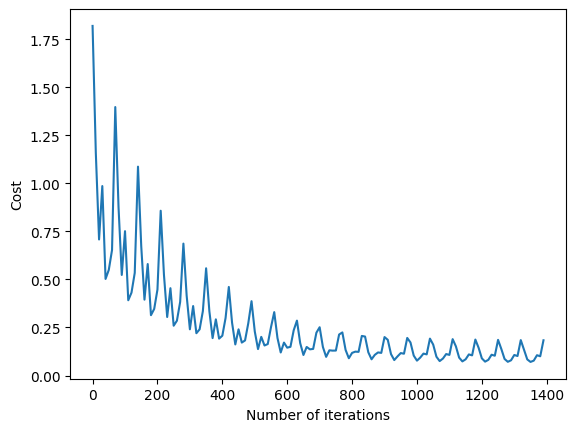

In [ ]:
def mini_batch_gradient_descent(X, Y, alpha, num_iterations, batch_size):
    b, theta = initialize(X.shape[1]) # call initialize function to initialize intercept and weights based on # features in X (3 in this case)
    iter_num = 0
    mini_gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost']) # create a df with columns 'iteration' and 'cost'
    result_idx = 0

    m = len(Y)  # Number of training examples

    for each_iter in range(num_iterations):
        for i in range(0, m, batch_size): # div dataset into mini-batches; iterate over entire dataset (m) with step size of batch_size, creating mini-batches of size batch_size for processing
            # Select mini-batch
            X_batch = X[i:i+batch_size]
            Y_batch = Y[i:i+batch_size]

            Y_hat = predict_Y(b, theta, X_batch) # compute predicted values Y_hat using current values of b and theta and the features in the mini-batch X_batch
            this_cost = get_cost(Y_batch, Y_hat) # calculate cost between predicted values and true values using get_cost func
            prev_b = b # store current val of b for later use in the parameter update step
            prev_theta = theta # store current val of theta for later use in the parameter update step

            # Update parameters using mini-batch
            b, theta = update_theta(X_batch, Y_batch, Y_hat, prev_b, prev_theta, alpha)

            # Record cost at regular intervals
            if iter_num % 10 == 0: # every 10 iterations
                mini_gd_iterations_df.loc[result_idx] = [iter_num, this_cost] # assign list [iter_num, this_cost] to the row identified by 'result.idx'
                result_idx += 1  # increment 'result_idx' by 1
            iter_num += 1 # increment 'iter_num' by 1, regardless of whether cost is recorded or not

    print("Final Estimate of b and theta:", b, theta)
    return mini_gd_iterations_df, b, theta # return dataframe containing recorded cost vals as well as final estim of b and theta

mini_gd_iterations_df, b, theta = mini_batch_gradient_descent(X, Y, alpha=0.001, num_iterations=200, batch_size = 32) # call func. for small to medium-sized datasets, batch sizes in the range of 32 to 256 are effective. batch size of 1 = SGD

mini_gd_iterations_df[0:10] # display first 10 rows of df

# Plotting Iterations VS Cost
%matplotlib inline
plt.plot(mini_gd_iterations_df['iteration'],mini_gd_iterations_df['cost']) # plot iterations VS cost
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

# Checking which learning rate performs better for this dataset (alpha = 0.01 or alpha = 0.001)
# alpha_df_1_mini,b,theta=mini_batch_gradient_descent(X,Y,alpha=0.01,num_iterations=2000, batch_size = 32) # alpha = 0.01
# alpha_df_2_mini,b,theta=mini_batch_gradient_descent(X,Y,alpha=0.001,num_iterations=2000, batch_size = 32) # alpha = 0.001
# plt.plot(alpha_df_1_mini['iteration'],alpha_df_1_mini['cost'],label="alpha=0.01")
# plt.plot(alpha_df_2_mini['iteration'],alpha_df_2_mini['cost'],label="alpha=0.001")
# plt.legend()
# plt.ylabel('Cost')
# plt.xlabel('Number of iterations')
# plt.title('Cost Vs. Iterations for Different Alpha Values')

In summary, choose:
- Batch Gradient Descent: when computational resources allow and you need stable convergence.
- Stochastic Gradient Descent: when dealing with very large datasets and you need faster updates, possibly for online learning settings.
- Mini-Batch Gradient Descent: when you want a compromise between the stability of batch gradient descent and the computational efficiency of stochastic gradient descent, suitable for medium to large datasets.